In [0]:
pip install sklearn

In [0]:
pip install matplotlib

In [0]:
import numpy as np
import functools
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

In [0]:
class ParticleSwarm:
    def __init__(self, cost_func, dim, particle_size=32, chi=0.75, phi_prev=2.05, phi_global=2.05):
        self.cost_func = cost_func
        self.dim = dim

        self.particle_size = particle_size
        self.chi = chi
        self.phi_prev = phi_prev
        self.phi_global = phi_global

        self.X = np.random.uniform(size=(self.particle_size, self.dim))
        self.V = np.random.uniform(size=(self.particle_size, self.dim))

        self.prev = self.X.copy()
        self.cost = self.cost_func(self.X)
        self.glob = self.prev[self.cost.argmin()]
        self.min_cost = self.cost.min()

    def optimize(self, epsilon=1e-3, max_iter=100):
        iteration = 0
        while self.min_cost > epsilon and iteration < max_iter:
            self.update()
            iteration = iteration + 1
        return self.g

    def update(self):
        # Velocities update
        random_prev = np.random.uniform(size=(self.particle_size, self.dim))
        random_global = np.random.uniform(size=(self.particle_size, self.dim))

        self.V = self.chi * (self.V \
                + self.phi_prev * random_prev * (self.prev - self.X) \
                + self.phi_global * random_global * (self.glob - self.X))

        # Positions update
        self.X = self.X + self.V

        # Best scores
        costs = self.cost_func(self.X)

        min_costs_id = costs < self.cost
        self.prev[min_costs_id] = self.X[min_costs_id]
        self.cost[min_costs_id] = costs[min_costs_id]

        self.glob = self.prev[self.cost.argmin()]
        self.min_cost = self.cost.min()

In [0]:
class MultiLayerPerceptron:
    def __init__(self, shape, weights=None):
        self.shape = shape
        self.num_layers = len(shape)
        if weights is None:
            self.weights = []
            for i in xrange(self.num_layers-1):
                W = np.random.uniform(size=(self.shape[i+1], self.shape[i] + 1))
                self.weights.append(W)
        else:
            self.weights = weights


    def run(self, data):
        layer = data.T
        for i in range(self.num_layers-1):
            prev_layer = np.insert(layer, 0, 1, axis=0)
            o = np.dot(self.weights[i], prev_layer)
            layer = 1 / (1 + np.exp(-o))  # overflow comes from here
        return layer

In [0]:
def dim_weights(shape):
    dim = 0
    for i in range(len(shape)-1):
        dim = dim + (shape[i] + 1) * shape[i+1]
    return dim

def vector_to_weights(vector, shape):
    weights = []
    idx = 0
    for i in range(len(shape)-1):
        r = shape[i+1]
        c = shape[i] + 1
        idx_min = idx
        idx_max = idx + r*c
        weight = vector[idx_min:idx_max].reshape(r, c)
        weights.append(weight)
    return weights

def eval_neural_network(weights, shape, X, y):
    mse = np.asarray([])
    for w in weights:
        weights = vector_to_weights(w, shape)
        network = MultiLayerPerceptron(shape, weights=weights)
        y_pred = network.run(X)
        mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
    return mse

At batch 1, the accuracy is 0.0
At batch 2, the accuracy is 0.0
At batch 3, the accuracy is 0.0
At batch 4, the accuracy is 0.35714285714285715
At batch 5, the accuracy is 0.35714285714285715
At batch 6, the accuracy is 0.25
At batch 7, the accuracy is 0.35714285714285715
At batch 8, the accuracy is 0.7053571428571429
At batch 9, the accuracy is 0.7053571428571429
At batch 10, the accuracy is 0.7053571428571429
At batch 11, the accuracy is 0.7053571428571429
At batch 12, the accuracy is 0.7053571428571429
At batch 13, the accuracy is 0.7053571428571429
At batch 14, the accuracy is 0.7589285714285714
At batch 15, the accuracy is 0.7589285714285714
At batch 16, the accuracy is 0.7589285714285714
At batch 17, the accuracy is 0.7589285714285714
At batch 18, the accuracy is 0.7589285714285714
At batch 19, the accuracy is 0.7589285714285714
At batch 20, the accuracy is 0.7589285714285714
At batch 21, the accuracy is 0.7589285714285714
At batch 22, the accuracy is 0.7589285714285714
At batch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 95, the accuracy is 0.8928571428571429
At batch 96, the accuracy is 0.8928571428571429
At batch 97, the accuracy is 0.8928571428571429
At batch 98, the accuracy is 0.8928571428571429
At batch 99, the accuracy is 0.8928571428571429
At batch 100, the accuracy is 0.8928571428571429
At batch 101, the accuracy is 0.8928571428571429
At batch 102, the accuracy is 0.8928571428571429
At batch 103, the accuracy is 0.8928571428571429
At batch 104, the accuracy is 0.8928571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 105, the accuracy is 0.9017857142857143
At batch 106, the accuracy is 0.9017857142857143
At batch 107, the accuracy is 0.9017857142857143
At batch 108, the accuracy is 0.9017857142857143
At batch 109, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 110, the accuracy is 0.9017857142857143
At batch 111, the accuracy is 0.9017857142857143
At batch 112, the accuracy is 0.9017857142857143
At batch 113, the accuracy is 0.9017857142857143
At batch 114, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 115, the accuracy is 0.9017857142857143
At batch 116, the accuracy is 0.9017857142857143
At batch 117, the accuracy is 0.9017857142857143
At batch 118, the accuracy is 0.9017857142857143
At batch 119, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 120, the accuracy is 0.9017857142857143
At batch 121, the accuracy is 0.9017857142857143
At batch 122, the accuracy is 0.9017857142857143
At batch 123, the accuracy is 0.9017857142857143
At batch 124, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 125, the accuracy is 0.9017857142857143
At batch 126, the accuracy is 0.9017857142857143
At batch 127, the accuracy is 0.9017857142857143
At batch 128, the accuracy is 0.9017857142857143
At batch 129, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 130, the accuracy is 0.9017857142857143
At batch 131, the accuracy is 0.9017857142857143
At batch 132, the accuracy is 0.9017857142857143
At batch 133, the accuracy is 0.9017857142857143
At batch 134, the accuracy is 0.9017857142857143
At batch 135, the accuracy is 0.9017857142857143
At batch 136, the accuracy is 0.9017857142857143
At batch 137, the accuracy is 0.9017857142857143
At batch 138, the accuracy is 0.9017857142857143
At batch 139, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 140, the accuracy is 0.9017857142857143
At batch 141, the accuracy is 0.9017857142857143
At batch 142, the accuracy is 0.9017857142857143
At batch 143, the accuracy is 0.9017857142857143
At batch 144, the accuracy is 0.9017857142857143
At batch 145, the accuracy is 0.9017857142857143
At batch 146, the accuracy is 0.9017857142857143
At batch 147, the accuracy is 0.9017857142857143
At batch 148, the accuracy is 0.9017857142857143
At batch 149, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 150, the accuracy is 0.9017857142857143
At batch 151, the accuracy is 0.9017857142857143
At batch 152, the accuracy is 0.9017857142857143
At batch 153, the accuracy is 0.9017857142857143
At batch 154, the accuracy is 0.9017857142857143
At batch 155, the accuracy is 0.9017857142857143
At batch 156, the accuracy is 0.9017857142857143
At batch 157, the accuracy is 0.9017857142857143
At batch 158, the accuracy is 0.9017857142857143
At batch 159, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 160, the accuracy is 0.9017857142857143
At batch 161, the accuracy is 0.9017857142857143
At batch 162, the accuracy is 0.9017857142857143
At batch 163, the accuracy is 0.9017857142857143
At batch 164, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 165, the accuracy is 0.9017857142857143
At batch 166, the accuracy is 0.9017857142857143
At batch 167, the accuracy is 0.9017857142857143
At batch 168, the accuracy is 0.9017857142857143
At batch 169, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 170, the accuracy is 0.9017857142857143
At batch 171, the accuracy is 0.9017857142857143
At batch 172, the accuracy is 0.9017857142857143
At batch 173, the accuracy is 0.9017857142857143
At batch 174, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 175, the accuracy is 0.9017857142857143
At batch 176, the accuracy is 0.9017857142857143
At batch 177, the accuracy is 0.9017857142857143
At batch 178, the accuracy is 0.9017857142857143
At batch 179, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 180, the accuracy is 0.9017857142857143
At batch 181, the accuracy is 0.9017857142857143
At batch 182, the accuracy is 0.9017857142857143
At batch 183, the accuracy is 0.9017857142857143
At batch 184, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 185, the accuracy is 0.9017857142857143
At batch 186, the accuracy is 0.9017857142857143
At batch 187, the accuracy is 0.9017857142857143
At batch 188, the accuracy is 0.9017857142857143
At batch 189, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 190, the accuracy is 0.9017857142857143
At batch 191, the accuracy is 0.9017857142857143
At batch 192, the accuracy is 0.9017857142857143
At batch 193, the accuracy is 0.9017857142857143
At batch 194, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

At batch 195, the accuracy is 0.9017857142857143
At batch 196, the accuracy is 0.9017857142857143
At batch 197, the accuracy is 0.9017857142857143
At batch 198, the accuracy is 0.9017857142857143
At batch 199, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 200, the accuracy is 0.9017857142857143
At batch 201, the accuracy is 0.9017857142857143
At batch 202, the accuracy is 0.9017857142857143
At batch 203, the accuracy is 0.9017857142857143
At batch 204, the accuracy is 0.9017857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 205, the accuracy is 0.9017857142857143
At batch 206, the accuracy is 0.9017857142857143
At batch 207, the accuracy is 0.9017857142857143
At batch 208, the accuracy is 0.9464285714285714
At batch 209, the accuracy is 0.9464285714285714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 210, the accuracy is 0.9464285714285714
At batch 211, the accuracy is 0.9464285714285714
At batch 212, the accuracy is 0.9464285714285714
At batch 213, the accuracy is 0.9464285714285714
At batch 214, the accuracy is 0.9464285714285714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

At batch 215, the accuracy is 0.9464285714285714
At batch 216, the accuracy is 0.9464285714285714
At batch 217, the accuracy is 0.9464285714285714
At batch 218, the accuracy is 0.9464285714285714
At batch 219, the accuracy is 0.9464285714285714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 220, the accuracy is 0.9464285714285714
At batch 221, the accuracy is 0.9464285714285714
At batch 222, the accuracy is 0.9464285714285714
At batch 223, the accuracy is 0.9553571428571429
At batch 224, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 225, the accuracy is 0.9375
At batch 226, the accuracy is 0.9375
At batch 227, the accuracy is 0.9375
At batch 228, the accuracy is 0.9375
At batch 229, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 230, the accuracy is 0.9375
At batch 231, the accuracy is 0.9375
At batch 232, the accuracy is 0.9375
At batch 233, the accuracy is 0.9375
At batch 234, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 235, the accuracy is 0.9375
At batch 236, the accuracy is 0.9375
At batch 237, the accuracy is 0.9375
At batch 238, the accuracy is 0.9375
At batch 239, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 240, the accuracy is 0.9553571428571429
At batch 241, the accuracy is 0.9553571428571429
At batch 242, the accuracy is 0.9553571428571429
At batch 243, the accuracy is 0.9553571428571429
At batch 244, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 245, the accuracy is 0.9553571428571429
At batch 246, the accuracy is 0.9642857142857143
At batch 247, the accuracy is 0.9642857142857143
At batch 248, the accuracy is 0.9642857142857143
At batch 249, the accuracy is 0.9642857142857143
At batch 250, the accuracy is 0.9553571428571429
At batch 251, the accuracy is 0.9553571428571429
At batch 252, the accuracy is 0.9553571428571429
At batch 253, the accuracy is 0.9553571428571429
At batch 254, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 255, the accuracy is 0.9642857142857143
At batch 256, the accuracy is 0.9642857142857143
At batch 257, the accuracy is 0.9642857142857143
At batch 258, the accuracy is 0.9642857142857143
At batch 259, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 260, the accuracy is 0.9642857142857143
At batch 261, the accuracy is 0.9642857142857143
At batch 262, the accuracy is 0.9642857142857143
At batch 263, the accuracy is 0.9642857142857143
At batch 264, the accuracy is 0.9642857142857143
At batch 265, the accuracy is 0.9642857142857143
At batch 266, the accuracy is 0.9642857142857143
At batch 267, the accuracy is 0.9642857142857143
At batch 268, the accuracy is 0.9375
At batch 269, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 270, the accuracy is 0.9375
At batch 271, the accuracy is 0.9553571428571429
At batch 272, the accuracy is 0.9553571428571429
At batch 273, the accuracy is 0.9375
At batch 274, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 275, the accuracy is 0.9375
At batch 276, the accuracy is 0.9375
At batch 277, the accuracy is 0.9553571428571429
At batch 278, the accuracy is 0.9553571428571429
At batch 279, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 280, the accuracy is 0.9553571428571429
At batch 281, the accuracy is 0.9553571428571429
At batch 282, the accuracy is 0.9553571428571429
At batch 283, the accuracy is 0.9553571428571429
At batch 284, the accuracy is 0.9553571428571429
At batch 285, the accuracy is 0.9553571428571429
At batch 286, the accuracy is 0.9553571428571429
At batch 287, the accuracy is 0.9464285714285714
At batch 288, the accuracy is 0.9464285714285714
At batch 289, the accuracy is 0.9285714285714286


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 290, the accuracy is 0.9375
At batch 291, the accuracy is 0.9464285714285714
At batch 292, the accuracy is 0.9464285714285714
At batch 293, the accuracy is 0.9553571428571429
At batch 294, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 295, the accuracy is 0.9553571428571429
At batch 296, the accuracy is 0.9553571428571429
At batch 297, the accuracy is 0.9553571428571429
At batch 298, the accuracy is 0.9642857142857143
At batch 299, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 300, the accuracy is 0.9553571428571429
At batch 301, the accuracy is 0.9285714285714286
At batch 302, the accuracy is 0.9285714285714286
At batch 303, the accuracy is 0.9285714285714286
At batch 304, the accuracy is 0.9285714285714286


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 305, the accuracy is 0.9375
At batch 306, the accuracy is 0.9375
At batch 307, the accuracy is 0.9375
At batch 308, the accuracy is 0.9375
At batch 309, the accuracy is 0.9375
At batch 310, the accuracy is 0.9375
At batch 311, the accuracy is 0.9375
At batch 312, the accuracy is 0.9375
At batch 313, the accuracy is 0.9375
At batch 314, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 315, the accuracy is 0.9375
At batch 316, the accuracy is 0.9375
At batch 317, the accuracy is 0.9375
At batch 318, the accuracy is 0.9375
At batch 319, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 320, the accuracy is 0.9375
At batch 321, the accuracy is 0.9375
At batch 322, the accuracy is 0.9375
At batch 323, the accuracy is 0.9375
At batch 324, the accuracy is 0.9375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 325, the accuracy is 0.9375
At batch 326, the accuracy is 0.9375
At batch 327, the accuracy is 0.9375
At batch 328, the accuracy is 0.9375
At batch 329, the accuracy is 0.9464285714285714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 330, the accuracy is 0.9464285714285714
At batch 331, the accuracy is 0.9464285714285714
At batch 332, the accuracy is 0.9464285714285714
At batch 333, the accuracy is 0.9464285714285714
At batch 334, the accuracy is 0.9464285714285714
At batch 335, the accuracy is 0.9553571428571429
At batch 336, the accuracy is 0.9642857142857143
At batch 337, the accuracy is 0.9642857142857143
At batch 338, the accuracy is 0.9642857142857143
At batch 339, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 340, the accuracy is 0.9642857142857143
At batch 341, the accuracy is 0.9642857142857143
At batch 342, the accuracy is 0.9642857142857143
At batch 343, the accuracy is 0.9553571428571429
At batch 344, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 345, the accuracy is 0.9642857142857143
At batch 346, the accuracy is 0.9642857142857143
At batch 347, the accuracy is 0.9642857142857143
At batch 348, the accuracy is 0.9642857142857143
At batch 349, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 350, the accuracy is 0.9642857142857143
At batch 351, the accuracy is 0.9553571428571429
At batch 352, the accuracy is 0.9553571428571429
At batch 353, the accuracy is 0.9553571428571429
At batch 354, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 355, the accuracy is 0.9553571428571429
At batch 356, the accuracy is 0.9553571428571429
At batch 357, the accuracy is 0.9732142857142857
At batch 358, the accuracy is 0.9553571428571429
At batch 359, the accuracy is 0.9553571428571429


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 360, the accuracy is 0.9553571428571429
At batch 361, the accuracy is 0.9553571428571429
At batch 362, the accuracy is 0.9553571428571429
At batch 363, the accuracy is 0.9642857142857143
At batch 364, the accuracy is 0.9642857142857143
At batch 365, the accuracy is 0.9732142857142857
At batch 366, the accuracy is 0.9732142857142857
At batch 367, the accuracy is 0.9732142857142857
At batch 368, the accuracy is 0.9732142857142857
At batch 369, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 370, the accuracy is 0.9732142857142857
At batch 371, the accuracy is 0.9732142857142857
At batch 372, the accuracy is 0.9732142857142857
At batch 373, the accuracy is 0.9732142857142857
At batch 374, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 375, the accuracy is 0.9732142857142857
At batch 376, the accuracy is 0.9732142857142857
At batch 377, the accuracy is 0.9642857142857143
At batch 378, the accuracy is 0.9642857142857143
At batch 379, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 380, the accuracy is 0.9642857142857143
At batch 381, the accuracy is 0.9642857142857143
At batch 382, the accuracy is 0.9642857142857143
At batch 383, the accuracy is 0.9642857142857143
At batch 384, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 385, the accuracy is 0.9642857142857143
At batch 386, the accuracy is 0.9642857142857143
At batch 387, the accuracy is 0.9642857142857143
At batch 388, the accuracy is 0.9642857142857143
At batch 389, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 390, the accuracy is 0.9642857142857143
At batch 391, the accuracy is 0.9642857142857143
At batch 392, the accuracy is 0.9642857142857143
At batch 393, the accuracy is 0.9642857142857143
At batch 394, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 395, the accuracy is 0.9642857142857143
At batch 396, the accuracy is 0.9642857142857143
At batch 397, the accuracy is 0.9642857142857143
At batch 398, the accuracy is 0.9642857142857143
At batch 399, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 400, the accuracy is 0.9642857142857143
At batch 401, the accuracy is 0.9642857142857143
At batch 402, the accuracy is 0.9732142857142857
At batch 403, the accuracy is 0.9642857142857143
At batch 404, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 405, the accuracy is 0.9642857142857143
At batch 406, the accuracy is 0.9642857142857143
At batch 407, the accuracy is 0.9642857142857143
At batch 408, the accuracy is 0.9642857142857143
At batch 409, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 410, the accuracy is 0.9642857142857143
At batch 411, the accuracy is 0.9732142857142857
At batch 412, the accuracy is 0.9732142857142857
At batch 413, the accuracy is 0.9732142857142857
At batch 414, the accuracy is 0.9732142857142857
At batch 415, the accuracy is 0.9732142857142857
At batch 416, the accuracy is 0.9642857142857143
At batch 417, the accuracy is 0.9642857142857143
At batch 418, the accuracy is 0.9642857142857143
At batch 419, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 420, the accuracy is 0.9642857142857143
At batch 421, the accuracy is 0.9642857142857143
At batch 422, the accuracy is 0.9732142857142857
At batch 423, the accuracy is 0.9732142857142857
At batch 424, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 425, the accuracy is 0.9732142857142857
At batch 426, the accuracy is 0.9732142857142857
At batch 427, the accuracy is 0.9732142857142857
At batch 428, the accuracy is 0.9732142857142857
At batch 429, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 430, the accuracy is 0.9732142857142857
At batch 431, the accuracy is 0.9642857142857143
At batch 432, the accuracy is 0.9642857142857143
At batch 433, the accuracy is 0.9642857142857143
At batch 434, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 435, the accuracy is 0.9642857142857143
At batch 436, the accuracy is 0.9642857142857143
At batch 437, the accuracy is 0.9642857142857143
At batch 438, the accuracy is 0.9642857142857143
At batch 439, the accuracy is 0.9642857142857143
At batch 440, the accuracy is 0.9642857142857143
At batch 441, the accuracy is 0.9642857142857143
At batch 442, the accuracy is 0.9642857142857143
At batch 443, the accuracy is 0.9642857142857143
At batch 444, the accuracy is 0.9642857142857143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 445, the accuracy is 0.9642857142857143
At batch 446, the accuracy is 0.9642857142857143
At batch 447, the accuracy is 0.9642857142857143
At batch 448, the accuracy is 0.9642857142857143
At batch 449, the accuracy is 0.9642857142857143
At batch 450, the accuracy is 0.9642857142857143
At batch 451, the accuracy is 0.9642857142857143
At batch 452, the accuracy is 0.9732142857142857
At batch 453, the accuracy is 0.9732142857142857
At batch 454, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 455, the accuracy is 0.9732142857142857
At batch 456, the accuracy is 0.9732142857142857
At batch 457, the accuracy is 0.9732142857142857
At batch 458, the accuracy is 0.9732142857142857
At batch 459, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 460, the accuracy is 0.9732142857142857
At batch 461, the accuracy is 0.9732142857142857
At batch 462, the accuracy is 0.9732142857142857
At batch 463, the accuracy is 0.9732142857142857
At batch 464, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 465, the accuracy is 0.9732142857142857
At batch 466, the accuracy is 0.9732142857142857
At batch 467, the accuracy is 0.9732142857142857
At batch 468, the accuracy is 0.9732142857142857
At batch 469, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 470, the accuracy is 0.9732142857142857
At batch 471, the accuracy is 0.9732142857142857
At batch 472, the accuracy is 0.9732142857142857
At batch 473, the accuracy is 0.9732142857142857
At batch 474, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 475, the accuracy is 0.9732142857142857
At batch 476, the accuracy is 0.9732142857142857
At batch 477, the accuracy is 0.9732142857142857
At batch 478, the accuracy is 0.9732142857142857
At batch 479, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 480, the accuracy is 0.9732142857142857
At batch 481, the accuracy is 0.9732142857142857
At batch 482, the accuracy is 0.9732142857142857
At batch 483, the accuracy is 0.9732142857142857
At batch 484, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 485, the accuracy is 0.9732142857142857
At batch 486, the accuracy is 0.9732142857142857
At batch 487, the accuracy is 0.9642857142857143
At batch 488, the accuracy is 0.9732142857142857
At batch 489, the accuracy is 0.9732142857142857
At batch 490, the accuracy is 0.9732142857142857
At batch 491, the accuracy is 0.9732142857142857
At batch 492, the accuracy is 0.9732142857142857
At batch 493, the accuracy is 0.9732142857142857
At batch 494, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 495, the accuracy is 0.9732142857142857
At batch 496, the accuracy is 0.9732142857142857
At batch 497, the accuracy is 0.9732142857142857
At batch 498, the accuracy is 0.9732142857142857
At batch 499, the accuracy is 0.9732142857142857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


At batch 500, the accuracy is 0.9732142857142857
The final accuracy on eval set is: 0.9736842105263158


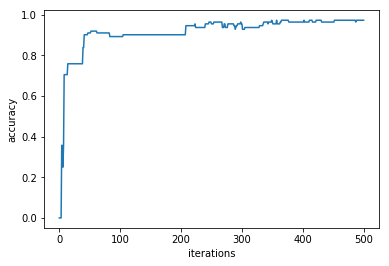

In [0]:
if __name__ == '__main__':

    # load iris datasets
    iris = sklearn.datasets.load_iris()
    X_train, X_eval, y_train, y_eval = sklearn.model_selection.train_test_split(iris.data, iris.target)

    num_inputs = X_train.shape[1]
    
    num_classes = 3
    y_train_true = np.zeros((len(y_train), num_classes))
    for i in range(len(y_train)):
        y_train_true[i, y_train[i]] = 1

    y_eval_true = np.zeros((len(y_eval), num_classes))
    for i in range(len(y_eval)):
        y_eval_true[i, y_eval[i]] = 1

    # Set up
    shape = (num_inputs, 64, 32, num_classes)

    cost_func = functools.partial(eval_neural_network, shape=shape, X=X_train, y=y_train_true.T)
    
    swarm = ParticleSwarm(cost_func, dim=dim_weights(shape), particle_size=60, chi=0.75, phi_prev=2.05, phi_global=2.05)

    batch_list = []
    acc_list = []
    
    # Train
    i = 0
    best_scores = [(i, swarm.min_cost)]
    best_weights = vector_to_weights(swarm.glob, shape)
    best_network = MultiLayerPerceptron(shape, weights=best_weights)
    y_train_pred = np.round(best_network.run(X_train))
    accuracy = sklearn.metrics.accuracy_score(y_train_true, y_train_pred.T)
    batch_list.append(i)
    acc_list.append(accuracy)
    while swarm.min_cost > 1e-6 and i<500:
        swarm.update()
        i = i+1
        if swarm.min_cost < best_scores[-1][1]:
            best_scores.append((i, swarm.min_cost))
        
        # Eval on train set to get accuracy
        best_weights = vector_to_weights(swarm.glob, shape)
        best_network = MultiLayerPerceptron(shape, weights=best_weights)
        y_train_pred = np.round(best_network.run(X_train))
        accuracy = sklearn.metrics.accuracy_score(y_train_true, y_train_pred.T)
        batch_list.append(i)
        acc_list.append(accuracy)
        print('At batch {0}, the accuracy is {1}'.format(i, accuracy))
    
    # Eval
    best_weights = vector_to_weights(swarm.glob, shape)
    best_network = MultiLayerPerceptron(shape, weights=best_weights)
    y_eval_pred = np.round(best_network.run(X_eval))
    accuracy = sklearn.metrics.accuracy_score(y_eval_true, y_eval_pred.T)
    print('The final accuracy on eval set is:', accuracy)
    
    fig = plt.figure()
    sub = fig.add_subplot(111)
    sub.set_xlabel('iterations')
    sub.set_ylabel('accuracy')
    sub.plot(batch_list, acc_list)
    plt.show()
    